In [2]:
#to work with dataframes
import pandas as pd
#to perform numerical operations
import numpy as np
#to visualize data
import seaborn as sns
#to partition the data
from sklearn.model_selection import train_test_split
#importing library for logistic regression
from sklearn.linear_model import LogisticRegression
#importing performance metrics - accuracy score and confusion
from sklearn.metrics import accuracy_score, confusion_matrix


In [3]:
#importing data
data_income = pd.read_csv('income(1).csv', na_values = [" ?"])
#creating copy of original data
data = data_income.copy()


#### Exploratory data analysis:
#### 1. Getting to know about the data
#### 2. Data preprocessing (missing values)
#### 3. Cross tables and data visualization

In [4]:
#getting to know about data, checking variables' data type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            31978 non-null  int64 
 1   JobType        30169 non-null  object
 2   EdType         31978 non-null  object
 3   maritalstatus  31978 non-null  object
 4   occupation     30162 non-null  object
 5   relationship   31978 non-null  object
 6   race           31978 non-null  object
 7   gender         31978 non-null  object
 8   capitalgain    31978 non-null  int64 
 9   capitalloss    31978 non-null  int64 
 10  hoursperweek   31978 non-null  int64 
 11  nativecountry  31978 non-null  object
 12  SalStat        31978 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB


In [5]:
#check for missing values
data.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [6]:
#summary of numerical variables
summary_num  = data.describe()
summary_num

,age,capitalgain,capitalloss,hoursperweek
count,31978.000000,31978.000000,31978.000000,31978.000000
mean,38.579023,1064.360623,86.739352,40.417850
std,13.662085,7298.596271,401.594301,12.345285
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [7]:
#summary of categorical values
summary_cate = data.describe(include = "O")
summary_cate

,JobType,EdType,maritalstatus,occupation,relationship,race,gender,nativecountry,SalStat
count,30169,31978,31978,30162,31978,31978,31978,31978,31978
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,"less than or equal to 50,000"
freq,22286,10368,14692,4038,12947,27430,21370,29170,24283


In [8]:
#frequency of each categories
#data['JobType'].value_counts()
data['occupation'].value_counts()

 Prof-specialty       4038
 Craft-repair         4030
 Exec-managerial      3992
 Adm-clerical         3721
 Sales                3584
 Other-service        3212
 Machine-op-inspct    1966
 Transport-moving     1572
 Handlers-cleaners    1350
 Farming-fishing       989
 Tech-support          912
 Protective-serv       644
 Priv-house-serv       143
 Armed-Forces            9
Name: occupation, dtype: int64

In [9]:
#checking for unique classes
#print(np.unique(data['JobType']))
#print(np.unique(data['occupation']))

In [10]:
#there exists ' ?' instead of nan
#go back and read the data by including 'na_values[' ?']

In [11]:
data.isnull().sum()

age                 0
JobType          1809
EdType              0
maritalstatus       0
occupation       1816
relationship        0
race                0
gender              0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry       0
SalStat             0
dtype: int64

In [12]:
missing = data[data.isnull().any(axis = 1)]
print(missing)
#axis = 1 to consider atleast one column value is missing

       age JobType         EdType        maritalstatus occupation  \
8       17     NaN           11th        Never-married        NaN   
17      32     NaN   Some-college   Married-civ-spouse        NaN   
29      22     NaN   Some-college        Never-married        NaN   
42      52     NaN           12th        Never-married        NaN   
44      63     NaN        1st-4th   Married-civ-spouse        NaN   
...    ...     ...            ...                  ...        ...   
31892   59     NaN      Bachelors   Married-civ-spouse        NaN   
31934   20     NaN        HS-grad        Never-married        NaN   
31945   28     NaN   Some-college   Married-civ-spouse        NaN   
31967   80     NaN        HS-grad              Widowed        NaN   
31968   17     NaN           11th        Never-married        NaN   

          relationship    race   gender  capitalgain  capitalloss  \
8            Own-child   White   Female            0            0   
17             Husband   White   

In [13]:
data2 = data.dropna(axis = 0)
data2

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,United-States,"less than or equal to 50,000"
31974,34,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,0,0,40,United-States,"less than or equal to 50,000"
31975,23,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
31976,42,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,"less than or equal to 50,000"


In [14]:



#relationship between independent variables
correlation = data2.corr()
correlation

,age,capitalgain,capitalloss,hoursperweek
age,1.000000,0.080154,0.060165,0.101599
capitalgain,0.080154,1.000000,-0.032229,0.080432
capitalloss,0.060165,-0.032229,1.000000,0.052417
hoursperweek,0.101599,0.080432,0.052417,1.000000


### Crosstables and Data Visualization

In [15]:
#extracting column names
data2.columns

Index(['age', 'JobType', 'EdType', 'maritalstatus', 'occupation',
       'relationship', 'race', 'gender', 'capitalgain', 'capitalloss',
       'hoursperweek', 'nativecountry', 'SalStat'],
      dtype='object')

In [16]:
#gender proportion table
gender = pd.crosstab(index = data2["gender"],
                     columns = 'count',
                     normalize = True)

print(gender)

col_0       count
gender           
 Female  0.324315
 Male    0.675685


In [17]:
#gender vs salary status:
gender_salstat = pd.crosstab(index = data2['gender'],
                            columns = data2['SalStat'],
                            margins = True,
                            normalize = 'index')

print(gender_salstat)

SalStat   greater than 50,000   less than or equal to 50,000
gender                                                      
 Female              0.113678                       0.886322
 Male                0.313837                       0.686163
All                  0.248922                       0.751078


C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


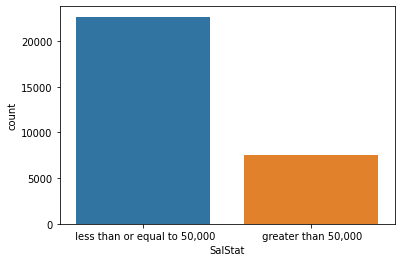

In [18]:
#frequency distribution of 'Salary Status'
SalStat = sns.countplot(data2['SalStat'])

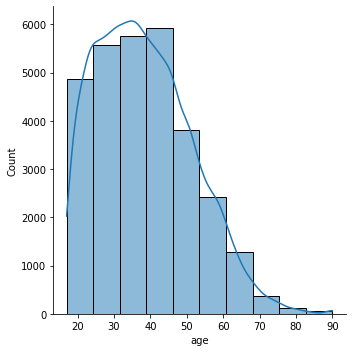

In [19]:
#histogram of age
sns.displot(data2['age'], bins = 10, kde = True)
#sns.displot(data2['age'])

C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


SalStat
 greater than 50,000             43.0
 less than or equal to 50,000    34.0
Name: age, dtype: float64

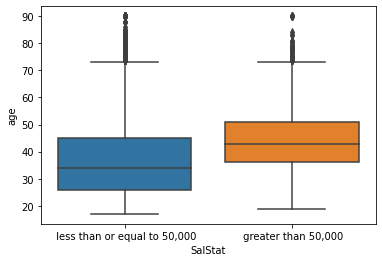

In [20]:
#boxplot - age vs salary status
sns.boxplot('SalStat', 'age', data = data2)
data2.groupby('SalStat')['age'].median()

<AxesSubplot:xlabel='count', ylabel='occupation'>

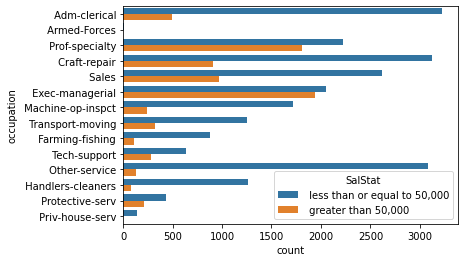

In [21]:
sns.countplot(y = "occupation", data = data2, hue = 'SalStat')

## Logistic Regression

In [22]:
data3 = data.dropna(axis = 0)
data3

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,34,Local-gov,HS-grad,Never-married,Farming-fishing,Not-in-family,Black,Male,594,0,60,United-States,"less than or equal to 50,000"
31974,34,Local-gov,Some-college,Never-married,Protective-serv,Not-in-family,White,Female,0,0,40,United-States,"less than or equal to 50,000"
31975,23,Private,Some-college,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,"less than or equal to 50,000"
31976,42,Local-gov,Some-college,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,40,United-States,"less than or equal to 50,000"


In [23]:
#Reindexing the salary status names to 0, 1

val_1 = data3["SalStat"].unique()[0]
val_2 = data3["SalStat"].unique()[1]

data3["SalStat"] = data3["SalStat"].map({val_1 :0, val_2 :1})

print(data3['SalStat'])

0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 30162, dtype: int64


C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [24]:
data3.head(50)

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,0
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,0
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,1
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,0
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,0
5,44,Private,HS-grad,Widowed,Exec-managerial,Unmarried,Black,Female,0,0,40,United-States,0
6,51,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,0
7,20,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,0
9,19,Private,HS-grad,Never-married,Machine-op-inspct,Own-child,Black,Female,0,0,40,United-States,0
10,45,Self-emp-inc,Some-college,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,55,United-States,1


In [25]:
data3.isna().sum()

age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64

In [26]:
new_data = pd.get_dummies(data3, drop_first = True)
new_data.head(70)

,age,capitalgain,capitalloss,hoursperweek,SalStat,JobType_ Local-gov,JobType_ Private,JobType_ Self-emp-inc,JobType_ Self-emp-not-inc,JobType_ State-gov,...,nativecountry_ Portugal,nativecountry_ Puerto-Rico,nativecountry_ Scotland,nativecountry_ South,nativecountry_ Taiwan,nativecountry_ Thailand,nativecountry_ Trinadad&Tobago,nativecountry_ United-States,nativecountry_ Vietnam,nativecountry_ Yugoslavia
0,45,0,0,28,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,24,0,0,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,44,0,0,40,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,27,0,0,40,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,0,0,35,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,28,0,0,45,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
74,25,0,0,20,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
77,34,0,0,50,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
78,38,15024,0,80,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [27]:
#Storing the column namaes
columns_list = list(new_data.columns)
columns_list

['age',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'SalStat',
 'JobType_ Local-gov',
 'JobType_ Private',
 'JobType_ Self-emp-inc',
 'JobType_ Self-emp-not-inc',
 'JobType_ State-gov',
 'JobType_ Without-pay',
 'EdType_ 11th',
 'EdType_ 12th',
 'EdType_ 1st-4th',
 'EdType_ 5th-6th',
 'EdType_ 7th-8th',
 'EdType_ 9th',
 'EdType_ Assoc-acdm',
 'EdType_ Assoc-voc',
 'EdType_ Bachelors',
 'EdType_ Doctorate',
 'EdType_ HS-grad',
 'EdType_ Masters',
 'EdType_ Preschool',
 'EdType_ Prof-school',
 'EdType_ Some-college',
 'maritalstatus_ Married-AF-spouse',
 'maritalstatus_ Married-civ-spouse',
 'maritalstatus_ Married-spouse-absent',
 'maritalstatus_ Never-married',
 'maritalstatus_ Separated',
 'maritalstatus_ Widowed',
 'occupation_ Armed-Forces',
 'occupation_ Craft-repair',
 'occupation_ Exec-managerial',
 'occupation_ Farming-fishing',
 'occupation_ Handlers-cleaners',
 'occupation_ Machine-op-inspct',
 'occupation_ Other-service',
 'occupation_ Priv-house-serv',
 'occupation_ Pr

In [28]:
#Separating input names from the data
features = list(set(columns_list)-set(['SalStat']))
features

['nativecountry_ South',
 'EdType_ 9th',
 'nativecountry_ Cuba',
 'nativecountry_ Germany',
 'nativecountry_ Iran',
 'maritalstatus_ Never-married',
 'nativecountry_ Canada',
 'nativecountry_ Philippines',
 'nativecountry_ Guatemala',
 'nativecountry_ Peru',
 'nativecountry_ Haiti',
 'nativecountry_ Portugal',
 'nativecountry_ Nicaragua',
 'EdType_ Masters',
 'nativecountry_ Columbia',
 'EdType_ Prof-school',
 'maritalstatus_ Married-AF-spouse',
 'relationship_ Unmarried',
 'nativecountry_ Japan',
 'EdType_ Preschool',
 'occupation_ Handlers-cleaners',
 'EdType_ 5th-6th',
 'capitalloss',
 'EdType_ HS-grad',
 'nativecountry_ Thailand',
 'JobType_ Private',
 'JobType_ Self-emp-inc',
 'nativecountry_ Poland',
 'hoursperweek',
 'nativecountry_ Dominican-Republic',
 'nativecountry_ Outlying-US(Guam-USVI-etc)',
 'nativecountry_ Yugoslavia',
 'occupation_ Sales',
 'occupation_ Armed-Forces',
 'maritalstatus_ Married-spouse-absent',
 'occupation_ Priv-house-serv',
 'maritalstatus_ Married-civ-

In [29]:
# Storing the output values in y
y = new_data['SalStat'].values
print(y)

[0 0 1 ... 0 0 0]


In [30]:
# Storing the values from input features
x = new_data[features].values
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]], dtype=int64)

In [31]:
# Splitting the data into train and test
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size = 0.3, random_state = 0)

In [32]:
# Make an instance of the Model
logistic = LogisticRegression()

In [33]:
# Fitting the values for x and y
logistic.fit(train_x, train_y)
logistic.coef_
logistic.intercept_

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([-1.04011139])

In [34]:
# Prediction from test data
prediction = logistic.predict(test_x)
print(prediction)

[0 0 0 ... 0 0 0]


In [35]:
# Confusion matrix
confusion_matrix = confusion_matrix(test_y, prediction)
print(confusion_matrix)

[[6291  532]
 [ 945 1281]]


In [36]:
# Calculating the accuracy
accuracy_score = accuracy_score(test_y, prediction)
print(accuracy_score)

0.836777544480053


In [37]:
# Printing the misclassified values from prediction
print('Misclassified samples: %d' %(test_y != prediction).sum())

Misclassified samples: 1477


##### LOGISTIC REGRESSION - REMOVING INSIGNIFICANT VARIABLES

In [38]:
# Reindexing the salary status names to 0, 1
val_1 = data3["SalStat"].unique()[0]
val_2 = data3["SalStat"].unique()[1]

data3["SalStat"] = data3["SalStat"].map({val_1 :0, val_2 :1})

print(data3['SalStat'])

0        0
1        0
2        1
3        0
4        0
        ..
31973    0
31974    0
31975    0
31976    0
31977    0
Name: SalStat, Length: 30162, dtype: int64


C:\Users\ASUS\AppData\Roaming\Python\Python39\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [39]:
# List storing insignificant columns
cols = ['gender', 'nativecountry', 'race', 'JobType']

In [40]:
# Dropping them
new_data = data3.drop(cols, axis = 1)

In [41]:
new_data = pd.get_dummies(new_data, drop_first = True)

In [42]:
# Storing the column names
columns_list = list(new_data.columns)
print(columns_list)

['age', 'capitalgain', 'capitalloss', 'hoursperweek', 'SalStat', 'EdType_ 11th', 'EdType_ 12th', 'EdType_ 1st-4th', 'EdType_ 5th-6th', 'EdType_ 7th-8th', 'EdType_ 9th', 'EdType_ Assoc-acdm', 'EdType_ Assoc-voc', 'EdType_ Bachelors', 'EdType_ Doctorate', 'EdType_ HS-grad', 'EdType_ Masters', 'EdType_ Preschool', 'EdType_ Prof-school', 'EdType_ Some-college', 'maritalstatus_ Married-AF-spouse', 'maritalstatus_ Married-civ-spouse', 'maritalstatus_ Married-spouse-absent', 'maritalstatus_ Never-married', 'maritalstatus_ Separated', 'maritalstatus_ Widowed', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupation_ Protective-serv', 'occupation_ Sales', 'occupation_ Tech-support', 'occupation_ Transport-moving', 'relationship_ Not-in-family', 'relationship_ Other-rel

In [43]:
# Separating the input names from the data
features = list(set(columns_list)-set(['SalStat']))
features

['maritalstatus_ Separated',
 'EdType_ 9th',
 'occupation_ Farming-fishing',
 'occupation_ Protective-serv',
 'maritalstatus_ Never-married',
 'EdType_ Doctorate',
 'EdType_ Masters',
 'EdType_ Prof-school',
 'maritalstatus_ Married-AF-spouse',
 'relationship_ Unmarried',
 'EdType_ Preschool',
 'EdType_ 5th-6th',
 'occupation_ Craft-repair',
 'occupation_ Handlers-cleaners',
 'capitalloss',
 'EdType_ HS-grad',
 'occupation_ Machine-op-inspct',
 'EdType_ 11th',
 'hoursperweek',
 'occupation_ Transport-moving',
 'occupation_ Sales',
 'EdType_ Assoc-voc',
 'relationship_ Wife',
 'occupation_ Tech-support',
 'occupation_ Armed-Forces',
 'relationship_ Own-child',
 'maritalstatus_ Married-spouse-absent',
 'relationship_ Not-in-family',
 'EdType_ 12th',
 'relationship_ Other-relative',
 'maritalstatus_ Widowed',
 'occupation_ Priv-house-serv',
 'maritalstatus_ Married-civ-spouse',
 'EdType_ 7th-8th',
 'EdType_ Some-college',
 'EdType_ Assoc-acdm',
 'occupation_ Exec-managerial',
 'occupation

In [44]:
# Storing the output values in y
y = new_data['SalStat'].values
print(y)

[0 0 1 ... 0 0 0]


In [45]:
# Storing the values from input features
x = new_data[features].values
x

array([[ 0,  0,  0, ..., 45,  0,  0],
       [ 0,  0,  0, ..., 24,  0,  0],
       [ 0,  0,  0, ..., 44,  0,  0],
       ...,
       [ 0,  0,  0, ..., 23,  0,  0],
       [ 0,  0,  0, ..., 42,  0,  0],
       [ 0,  0,  0, ..., 29,  0,  1]], dtype=int64)

In [46]:
# Splitting the data into train and test
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size = 0.3, random_state = 0)

In [47]:
# Make an instance of the Model
logistic = LogisticRegression()

In [48]:
# Fitting the values for x and y
logistic.fit(train_x, train_y)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
# Prediction from test data
prediction = logistic.predict(test_x)
print(prediction)

[0 0 0 ... 0 0 0]


In [50]:
# Calculating the accuracy
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score = accuracy_score(test_y, prediction)
print(accuracy_score)

0.8342358271632224


### KNN Classifier Model

In [51]:
#importing the library of KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix

In [52]:
# import library for plotting
import matplotlib.pyplot as plt

In [53]:
# Storing the K nearest neighbors classifier
KNN_classifier = KNeighborsClassifier(n_neighbors = 5)

In [54]:
# Fitting the values for X and Y
KNN_classifier.fit(train_x, train_y)
KNN_classifier

KNeighborsClassifier()

In [55]:
# Predicting the test values with model
prediction = KNN_classifier.predict(test_x)

In [56]:
# Performance metric check
from sklearn.metrics import plot_confusion_matrix
confusion_matrix = confusion_matrix(test_y, prediction)
print("\t", "Predicted values")
print("Original values", "\n", confusion_matrix)

	 Predicted values
Original values 
 [[6188  635]
 [ 855 1371]]


In [57]:
# Calculating the accuracy
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score = accuracy_score(test_y, prediction)
print(accuracy_score)

0.835340921648801


In [58]:
print('Misclassified samples: %d' %(test_y != prediction).sum())

Misclassified samples: 1490


In [59]:
#Effect of K value on classifier

from sklearn.neighbors import KNeighborsClassifier
Misclassified_sample = []

# Calculating error for K values between 1 and 20
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(train_x, train_y)
    pred_i = knn.predict(test_x)
    Misclassified_sample.append((test_y != pred_i).sum())

In [60]:
print(Misclassified_sample)

[1723, 1512, 1541, 1480, 1490, 1442, 1467, 1433, 1437, 1416, 1413, 1434, 1437, 1445, 1426, 1420, 1438, 1423, 1441]


### ***SUBHAM***